# Unsupervised Face Clustering and Analysis

This notebook implements unsupervised face clustering using the LFW (Labeled Faces in the Wild) dataset. We explore various clustering algorithms and evaluate their performance in grouping similar faces together.

## 1. Data Loading

Load all CSV files from the filtered dataset directory into a dictionary of DataFrames for easy access.

In [1]:
import pandas as pd
import os

data_frames = {}
directory_path = 'filtered_dataset'

for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        df_name = os.path.splitext(filename)[0]
        data_frames[df_name] = pd.read_csv(file_path)

### Display Available DataFrames

List all the loaded CSV files to understand what data is available.

In [2]:
for key in data_frames.keys():
    print(key)

filtered_lfw_allnames
filtered_matchpairsDevTest
filtered_matchpairsDevTrain
filtered_mismatchpairsDevTest
filtered_mismatchpairsDevTrain
filtered_pairs
filtered_people
filtered_peopleDevTest
filtered_peopleDevTrain


### Explore Dataset Contents

Examine the structure and contents of each loaded DataFrame.

In [3]:
data_frames['filtered_lfw_allnames']

,name,images
0,Abdullah_Gul,19
1,Adrien_Brody,12
2,Alejandro_Toledo,39
3,Alvaro_Uribe,35
4,Amelie_Mauresmo,21
...,...,...
153,Vladimir_Putin,49
154,Walter_Mondale,10
155,Wen_Jiabao,13
156,Winona_Ryder,24


In [4]:
data_frames['filtered_mismatchpairsDevTrain'].sample(15)

,name,imagenum1,name.1,imagenum2
13,Hillary_Clinton,2,Zydrunas_Ilgauskas,1
20,Kim_Clijsters,6,Stephen_Ambrose,2
2,Ari_Fleischer,1,Janet_Leigh,1
17,Jose_Maria_Aznar,18,Svend_Robinson,1
23,Paradorn_Srichaphan,7,Wolfgang_Schuessel,2
16,Jennifer_Lopez,3,Johnny_Benson,1
5,Edmund_Stoiber,5,Kenneth_Carlsen,1
10,Gloria_Macapagal_Arroyo,34,Takaloo,1
21,Michael_Schumacher,3,Stephanie_Moore,1
6,George_HW_Bush,3,Kelly_Osbourne,1


In [5]:
data_frames['filtered_matchpairsDevTrain'].sample(15)

,name,imagenum1,imagenum2
71,Jason_Kidd,5,6
67,Jackie_Chan,1,10
55,Halle_Berry,10,16
100,John_Snow,2,4
44,George_HW_Bush,1,10
72,Jason_Kidd,6,9
86,Jennifer_Garner,4,5
35,David_Beckham,4,17
115,Kim_Ryong-sung,3,10
21,Bill_Simon,5,13


In [6]:
data_frames['filtered_pairs'].sample(15)

,name,imagenum1,imagenum2,Unnamed: 3
171,Catherine_Zeta-Jones,10,Pier_Ferdinando_Casini,1.0
158,Tony_Blair,105,121,NaN
282,Joschka_Fischer,1,10,NaN
172,Catherine_Zeta-Jones,11,Hayley_Tullett,2.0
561,Serena_Williams,3,32,NaN
17,Jacques_Rogge,3,7,NaN
315,Colin_Powell,95,Frank_Hsieh,1.0
348,Richard_Gere,1,10,NaN
123,Hu_Jintao,4,14,NaN
591,John_Howard,12,17,NaN


In [7]:
data_frames['filtered_people'].sample(15)

,name,images
51,Rubens_Barrichello,12.0
107,Luiz_Inacio_Lula_da_Silva,48.0
144,Rudolph_Giuliani,26.0
41,George_HW_Bush,13.0
44,Jiri_Novak,11.0
135,Bill_Simon,15.0
52,Taha_Yassin_Ramadan,15.0
63,Paul_Wolfowitz,10.0
88,Mike_Weir,11.0
139,John_Allen_Muhammad,11.0


In [8]:
data_frames['filtered_peopleDevTrain'].sample(15)

,name,images
51,John_Allen_Muhammad,11
69,Mahathir_Mohamad,14
92,Roh_Moo-hyun,32
58,Jose_Maria_Aznar,23
50,Joe_Lieberman,13
108,Vladimir_Putin,49
46,Jennifer_Aniston,21
88,Ricardo_Lagos,27
10,Bill_Gates,17
16,Colin_Powell,236


### Mismatch Pairs - Development/Training Set

View sample mismatch pairs (pairs of different people) used for training.

In [9]:
data_frames['filtered_mismatchpairsDevTrain'].sample(15)

,name,imagenum1,name.1,imagenum2
16,Jennifer_Lopez,3,Johnny_Benson,1
17,Jose_Maria_Aznar,18,Svend_Robinson,1
10,Gloria_Macapagal_Arroyo,34,Takaloo,1
6,George_HW_Bush,3,Kelly_Osbourne,1
7,George_HW_Bush,9,John_Lisowski,1
5,Edmund_Stoiber,5,Kenneth_Carlsen,1
23,Paradorn_Srichaphan,7,Wolfgang_Schuessel,2
0,Alejandro_Toledo,24,Dianne_Feinstein,2
18,Juan_Carlos_Ferrero,23,Sean_Hayes,2
14,Jack_Straw,6,John_Rosa,2


### Match Pairs - Development/Training Set

View sample match pairs (pairs of same person) used for training.

In [10]:
data_frames['filtered_matchpairsDevTrain'].sample(15)

,name,imagenum1,imagenum2
44,George_HW_Bush,1,10
77,Jean-David_Levitte,6,7
43,Fidel_Castro,4,14
123,Luiz_Inacio_Lula_da_Silva,17,42
74,Javier_Solana,2,6
51,Guillermo_Coria,19,29
16,Atal_Bihari_Vajpayee,17,24
33,Colin_Powell,74,205
127,Michael_Bloomberg,1,16
173,Tom_Hanks,6,10


### All Pairs Data

Sample from the complete pairs dataset containing both match and mismatch pairs.

In [11]:
data_frames['filtered_pairs'].sample(15)

,name,imagenum1,imagenum2,Unnamed: 3
24,Jennifer_Garner,4,9,NaN
645,Michael_Bloomberg,7,11,NaN
313,Tom_Daschle,15,21,NaN
275,Jennifer_Capriati,7,32,NaN
192,George_HW_Bush,4,6,NaN
207,Jiri_Novak,3,9,NaN
230,Norah_Jones,9,15,NaN
97,Andre_Agassi,4,33,NaN
320,Ari_Fleischer,7,12,NaN
362,Tiger_Woods,5,12,NaN


### People Dataset

Sample from the people dataset showing individuals and their image counts.

In [12]:
data_frames['filtered_people'].sample(15)

,name,images
111,Nicanor_Duarte_Frutos,11.0
152,Jennifer_Lopez,21.0
116,Tom_Hanks,10.0
144,Rudolph_Giuliani,26.0
101,James_Kelly,11.0
35,Spencer_Abraham,17.0
58,John_Paul_II,11.0
124,Jean_Charest,17.0
13,Paul_Bremer,20.0
118,Vladimir_Putin,49.0


### People Development/Training Set

Sample from the development/training subset of people.

In [13]:
data_frames['filtered_peopleDevTrain'].sample(15)

,name,images
86,Queen_Elizabeth_II,13
40,Jason_Kidd,10
70,Mark_Philippoussis,11
57,Joschka_Fischer,19
108,Vladimir_Putin,49
45,Jeb_Bush,12
58,Jose_Maria_Aznar,23
1,Andre_Agassi,36
89,Richard_Gephardt,11
41,Javier_Solana,10


### Data Type Conversion

Convert the 'images' column to integer type for proper numerical operations.

In [14]:
data_frames['filtered_people']['images'] = data_frames['filtered_people']['images'].astype(int)

### Image Count Distribution

Visualize the distribution of image counts per person using a count plot.

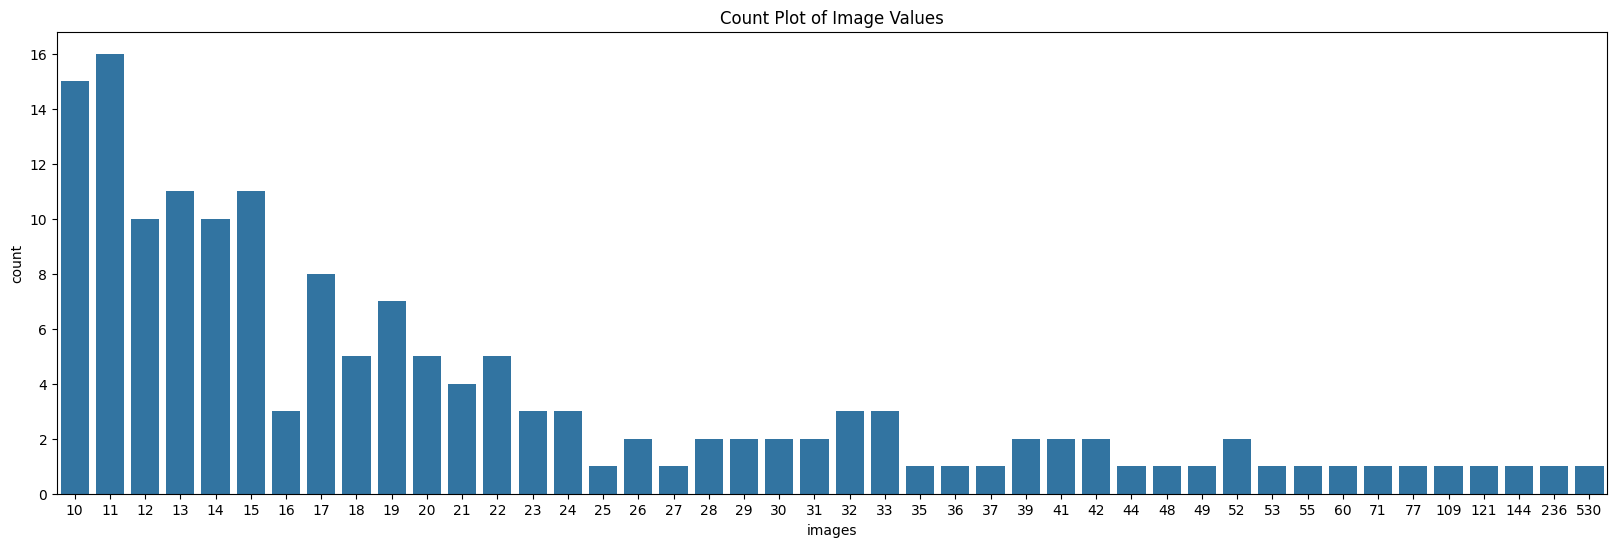

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
sns.countplot(data=data_frames['filtered_people'], x='images')
plt.title('Count Plot of Image Values')
plt.show()

## 2. Image Loading and Preprocessing

Set up paths and target size for loading and preprocessing face images. Images will be resized to 128x128 pixels.

In [16]:
import cv2
import numpy as np
from tqdm import tqdm

dataset_path = 'filtered_dataset/filtered_lfw-deepfunneled'
target_size = (250, 250)

### Image Processing Functions

Define helper functions to:
1. **load_and_preprocess_image**: Load an image, convert to grayscale, and resize
2. **extract_pixel_features**: Process all images in the dataset and extract flattened pixel values as features

In [17]:
def load_and_preprocess_image(image_path, target_size):
    try:
        if not image_path.lower().endswith((".jpg", ".jpeg", ".png")):
            return None, None
        
        img = cv2.imread(image_path)
        if img is None:
            return None, None
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)
        
        if len(img.shape) != 2:
            return None, None
        
        return img
    except Exception as e:
        return None, None

def extract_pixel_features(dataset_path, target_size):
    print("Building image list...")
    image_list = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                if os.path.isfile(image_path):
                    image_list.append((folder, image_path))
    
    print(f"Found {len(image_list)} images to process")
    
    results = []
    failed_count = 0
    
    for person_name, image_path in tqdm(image_list, desc="Processing"):
        img = load_and_preprocess_image(image_path, target_size)
        
        if img is None:
            failed_count += 1
            continue
        
        flat = img.flatten()
        
        if flat.shape[0] != target_size[0] * target_size[1]:
            failed_count += 1
            continue
        
        results.append((flat, person_name, image_path))
    
    print(f"\nSuccessfully processed: {len(results)} images")
    print(f"Failed: {failed_count} images")
    
    if len(results) == 0:
        print("ERROR: No images were successfully processed!")
        return None
    
    pixel_features = [r[0] for r in results]
    person_names = [r[1] for r in results]
    image_paths = [r[2] for r in results]
    
    person_names = pd.Series(person_names).str.replace('filtered_', '', regex=False).str.lower().str.replace('_', ' ')
    
    print("Creating DataFrame...")
    df = pd.DataFrame(np.vstack(pixel_features))
    df['person_name'] = person_names
    
    print(f"Final DataFrame shape: {df.shape}")
    print(f"Number of unique persons: {df['person_name'].nunique()}")
    
    return df

### Extract Pixel Features

Process all face images and extract pixel features. Each image is converted to a 16,384-dimensional feature vector (128×128 pixels).

In [18]:
pixel_features_df = extract_pixel_features(dataset_path, target_size)

Building image list...
Found 4324 images to process


Processing: 100%|██████████| 4324/4324 [00:03<00:00, 1326.37it/s]



Successfully processed: 4324 images
Failed: 0 images
Creating DataFrame...
Final DataFrame shape: (4324, 62501)
Number of unique persons: 158


### Verify Feature Extraction

Check the shape of the extracted pixel features DataFrame.

In [19]:
pixel_features_df.shape

(4324, 62501)

### Sample Person Names

Display a random sample of person names to verify data integrity.

In [20]:
pixel_features_df[['person_name']].sample(10)

,person_name
2316,jennifer capriati
1059,george w bush
3350,norah jones
3409,pervez musharraf
4257,vladimir putin
2974,lleyton hewitt
2816,kim ryong-sung
2373,jennifer lopez
2191,jean-david levitte
4255,vladimir putin


### Person Name Value Counts

Show the distribution of images per person in the processed dataset.

In [21]:
pixel_features_df['person_name'].value_counts()

person_name
george w bush        530
colin powell         236
tony blair           144
donald rumsfeld      121
gerhard schroeder    109
                    ... 
richard gere          10
tom hanks             10
tom cruise            10
tommy thompson        10
walter mondale        10
Name: count, Length: 158, dtype: int64

### Save Pixel Features

Export the extracted pixel features to a CSV file for future use.

In [22]:
# pixel_features_csv = 'pixel_features.csv'
# pixel_features_df.to_csv(pixel_features_csv, index=False)
# print(f"Pixel features saved to '{pixel_features_csv}'")

### Visualize Image Distribution

Create a bar chart showing the number of images per person, with mean and median reference lines.

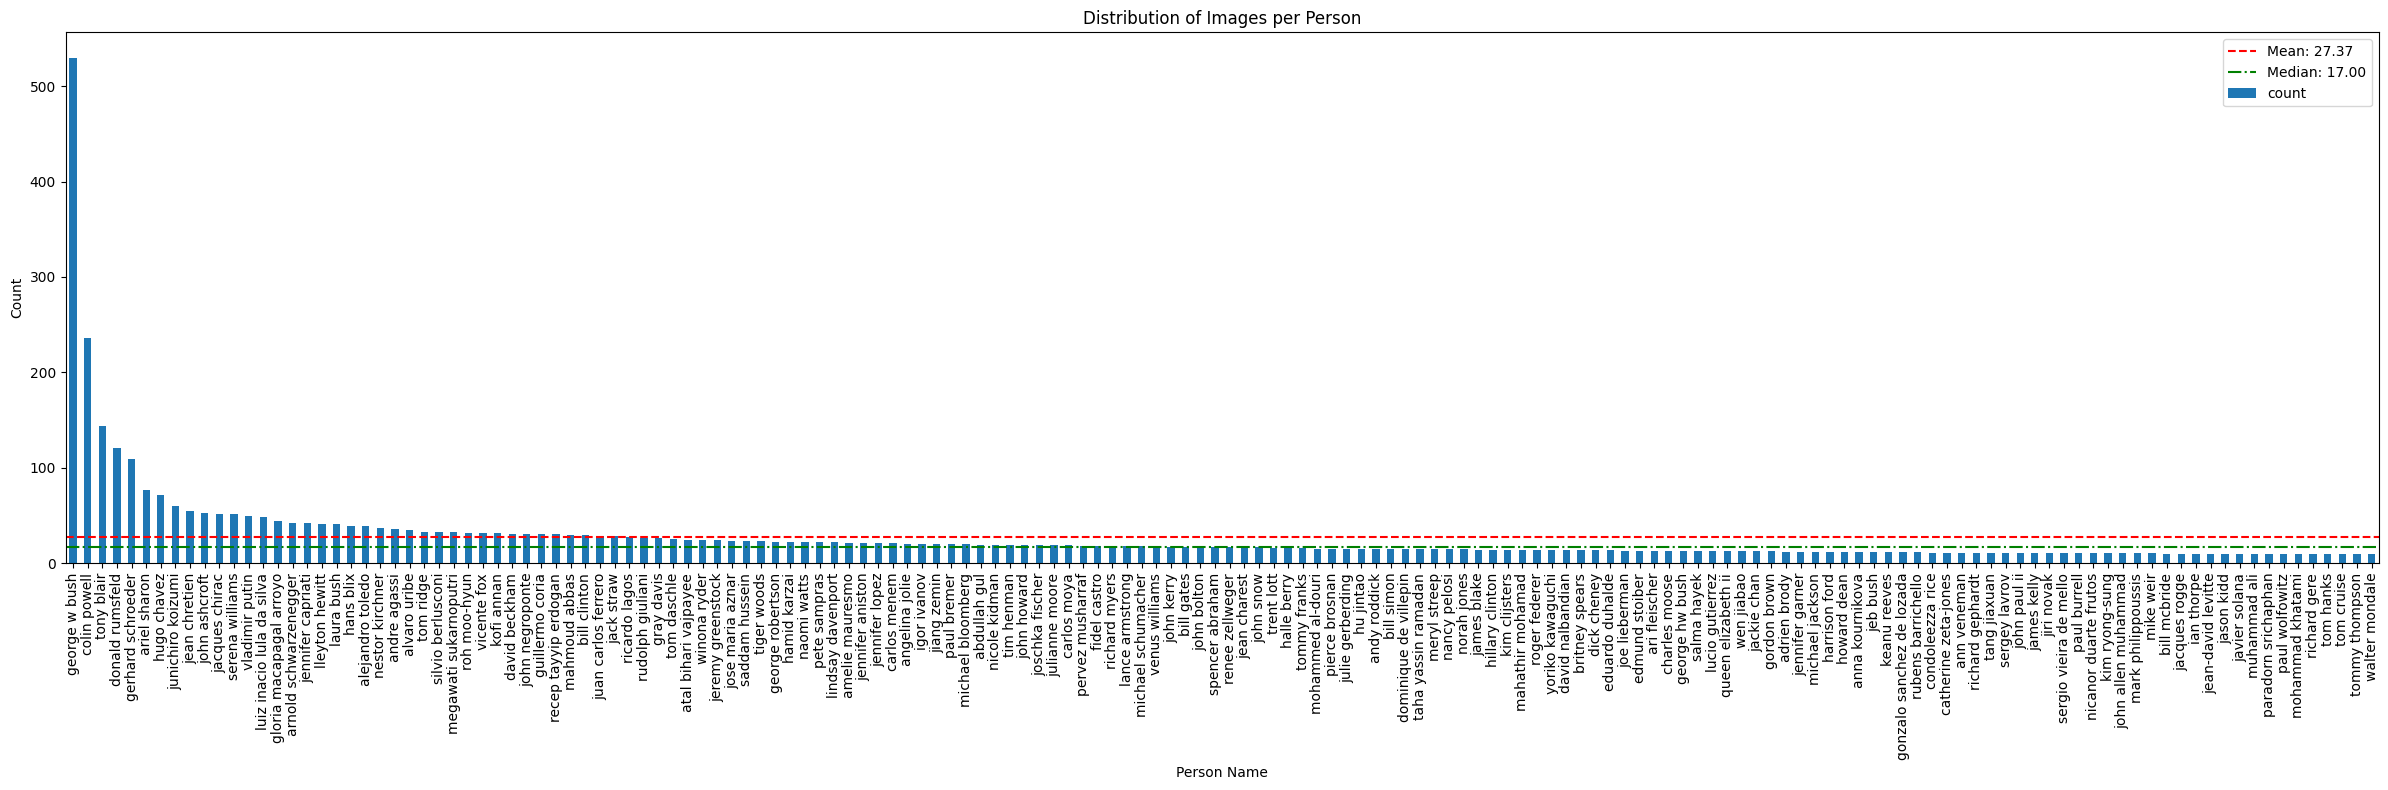

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 8))
pixel_features_df['person_name'].value_counts().plot(kind='bar')
plt.title('Distribution of Images per Person')
plt.xlabel('Person Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
counts = pixel_features_df['person_name'].value_counts()
plt.axhline(y=counts.mean(), color='r', linestyle='--', label=f'Mean: {counts.mean():.2f}')
plt.axhline(y=counts.median(), color='g', linestyle='-.', label=f'Median: {counts.median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

### Sample Image Reconstruction

Verify feature extraction by reconstructing a sample image from its pixel features and displaying at both original (128x128) and upsampled (512x512) resolutions.

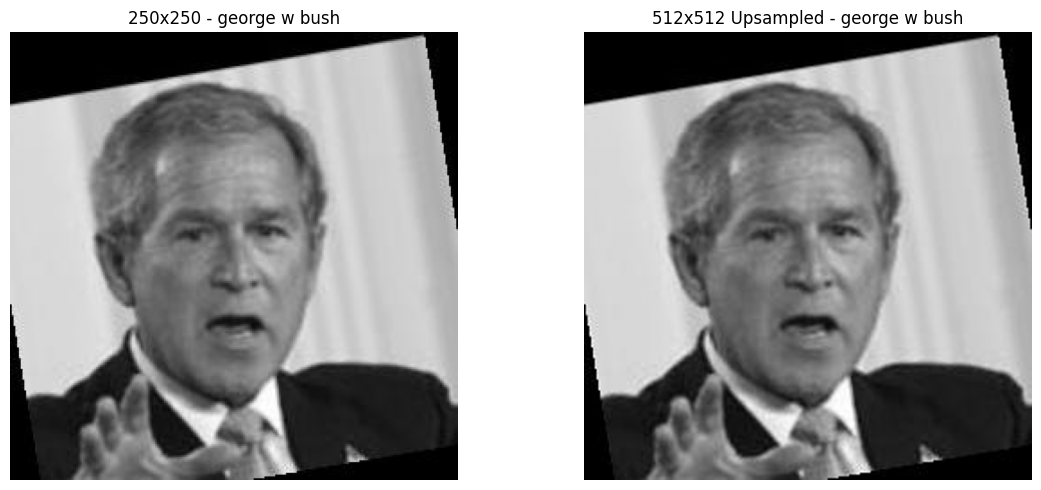

In [24]:
sample_row = pixel_features_df.sample(1).iloc[0]
pixel_cols = [col for col in pixel_features_df.columns if col not in ['person_name']]
image_pixels = sample_row[pixel_cols].values

image_128x128 = image_pixels.reshape(250, 250).astype(np.uint8)
image_512x512 = cv2.resize(image_128x128, (512, 512), interpolation=cv2.INTER_CUBIC)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image_128x128, cmap='gray')
axes[0].set_title(f"250x250 - {sample_row['person_name']}")
axes[0].axis('off')

axes[1].imshow(image_512x512, cmap='gray')
axes[1].set_title(f"512x512 Upsampled - {sample_row['person_name']}")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### Dataset Summary Visualizations

Create visualizations showing:
1. Top 15 persons by image count
2. Histogram of image count distribution across all persons

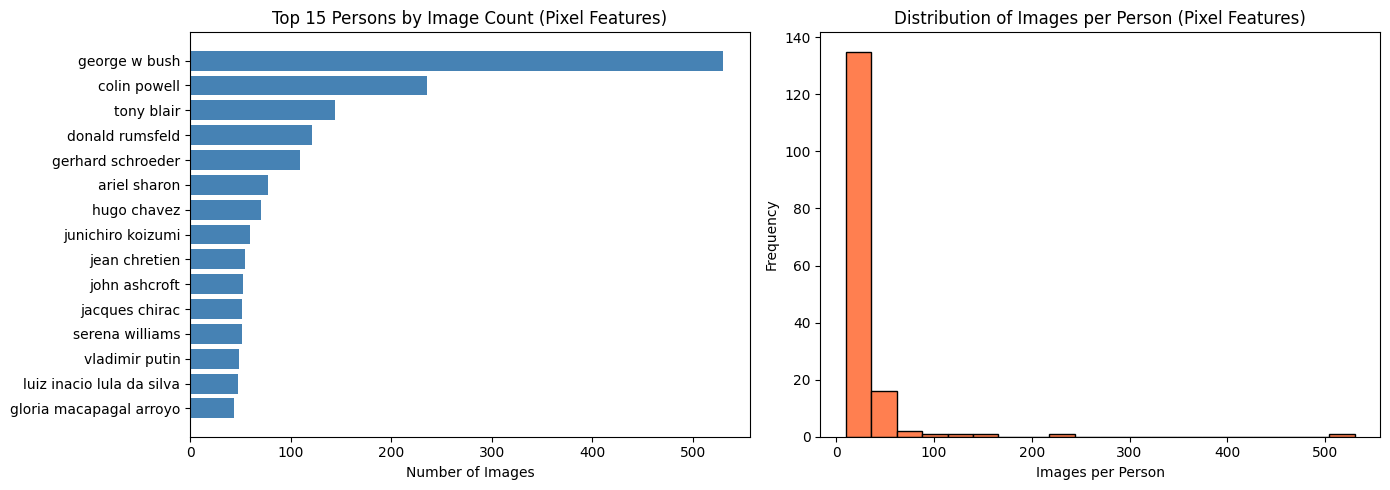

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

top_persons = pixel_features_df['person_name'].value_counts().head(15)
axes[0].barh(top_persons.index, top_persons.values, color='steelblue')
axes[0].set_xlabel('Number of Images')
axes[0].set_title('Top 15 Persons by Image Count (Pixel Features)')
axes[0].invert_yaxis()

person_counts = pixel_features_df['person_name'].value_counts()
axes[1].hist(person_counts.values, bins=20, color='coral', edgecolor='black')
axes[1].set_xlabel('Images per Person')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Images per Person (Pixel Features)')

plt.tight_layout()
plt.show()

## 3. Dimensionality Reduction with PCA

Apply Principal Component Analysis (PCA) to reduce the high-dimensional pixel features while retaining 95% of the variance. This helps with:
- Reducing computational complexity
- Removing noise
- Improving clustering performance

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pixel_cols = [col for col in pixel_features_df.columns if col not in ['person_name']]
X = pixel_features_df[pixel_cols].values
y = pixel_features_df['person_name'].values

print("Standardizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardizing features...


### Fit PCA

Apply PCA transformation, keeping components that explain 95% of the total variance.

In [28]:
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

### PCA Results Summary

Display the dimensionality reduction achieved and variance explained.

In [29]:
print(f"Original shape: {X.shape}")
print(f"Reduced shape: {X_pca.shape}")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.4f}")
print(f"Number of components: {pca.n_components_}")

Original shape: (4324, 62500)
Reduced shape: (4324, 248)
Variance explained: 0.9003
Number of components: 248


### PCA Variance Analysis

Visualize:
1. Variance explained by each principal component
2. Cumulative variance explained with 95% threshold line

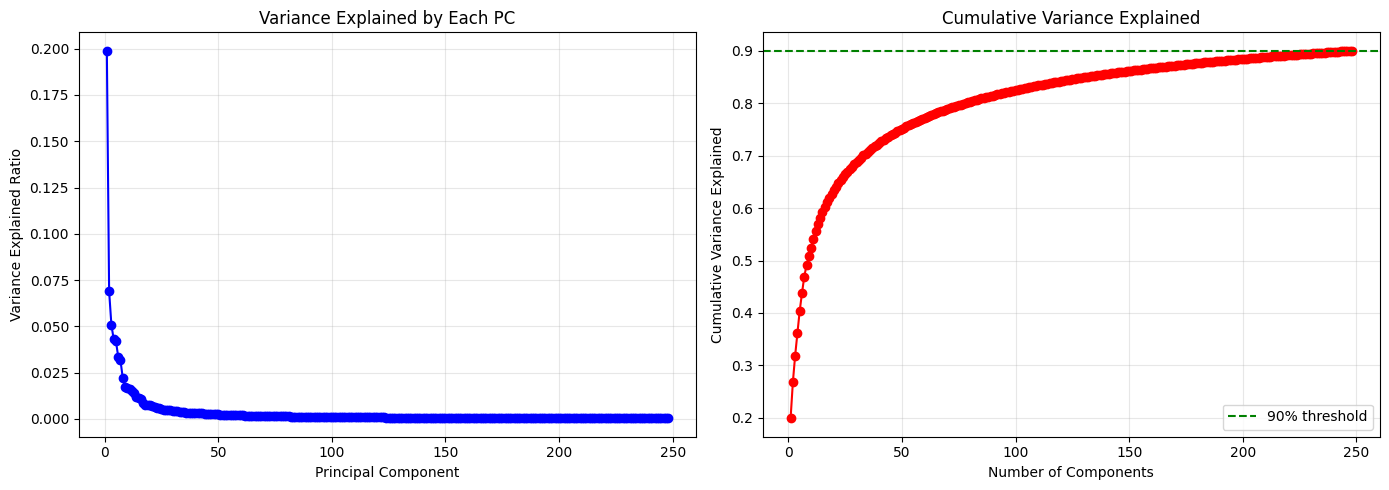

In [30]:
cumsum_var = np.cumsum(pca.explained_variance_ratio_)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Explained Ratio')
axes[0].set_title('Variance Explained by Each PC')
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-')
axes[1].axhline(y=0.90, color='g', linestyle='--', label='90% threshold')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Variance Explained')
axes[1].set_title('Cumulative Variance Explained')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Save PCA Features

Export the PCA-transformed features to a CSV file for future use.

In [31]:
print("Creating PCA DataFrame...")
pca_df = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])
pca_df['person_name'] = y

pca_csv = 'pca_features_variance.csv'
pca_df.to_csv(pca_csv, index=False)

Creating PCA DataFrame...


### PCA Image Reconstruction Comparison

Compare original images with their PCA reconstructions to visualize the information preserved after dimensionality reduction. This helps understand the trade-off between compression and image quality.

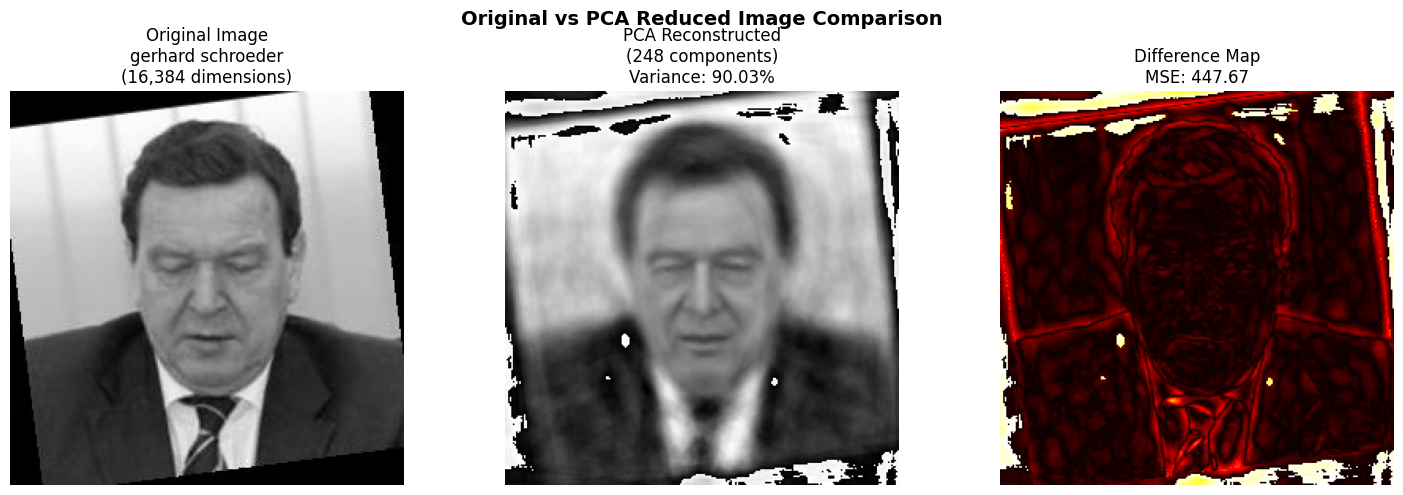

Original dimensions: 62500
PCA dimensions: 248
Dimensionality reduction: 99.6%


In [32]:
sample_idx = np.random.randint(0, len(pixel_features_df))
sample_row = pixel_features_df.iloc[sample_idx]

pixel_cols = [col for col in pixel_features_df.columns if col not in ['person_name']]
original_pixels = sample_row[pixel_cols].values
original_image = original_pixels.reshape(250, 250).astype(np.uint8)

pca_features = X_pca[sample_idx].reshape(1, -1)
reconstructed_scaled = pca.inverse_transform(pca_features)
reconstructed_pixels = scaler.inverse_transform(reconstructed_scaled)
reconstructed_image = reconstructed_pixels.reshape(250, 250).astype(np.uint8)

mse = np.mean((original_pixels - reconstructed_pixels.flatten()) ** 2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title(f"Original Image\n{sample_row['person_name']}\n(16,384 dimensions)")
axes[0].axis('off')

axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title(f"PCA Reconstructed\n({pca.n_components_} components)\nVariance: {pca.explained_variance_ratio_.sum():.2%}")
axes[1].axis('off')

difference = np.abs(original_image.astype(float) - reconstructed_image.astype(float))
axes[2].imshow(difference, cmap='hot')
axes[2].set_title(f"Difference Map\nMSE: {mse:.2f}")
axes[2].axis('off')

plt.suptitle('Original vs PCA Reduced Image Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Original dimensions: {len(pixel_cols)}")
print(f"PCA dimensions: {pca.n_components_}")
print(f"Dimensionality reduction: {(1 - pca.n_components_/len(pixel_cols))*100:.1f}%")

In [33]:
import pickle

model = {
    'scaler': scaler,
    'pca': pca
}

model_path = 'pca_scaler_model.pickle'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"PCA and Scaler saved to '{model_path}'")
print(f"  - Scaler: StandardScaler")
print(f"  - PCA components: {pca.n_components_}")
print(f"  - Variance explained: {pca.explained_variance_ratio_.sum():.4f}")

PCA and Scaler saved to 'pca_scaler_model.pickle'
  - Scaler: StandardScaler
  - PCA components: 248
  - Variance explained: 0.9003


## 4. Data Balancing (ADASYN & Tomek Links)

Address class imbalance in the dataset using:
- **Tomek Links**: Remove majority class samples that form Tomek pairs (undersampling)
- **ADASYN**: Generate synthetic samples for minority classes (oversampling)

Target: 35 samples per person for balanced clustering.

In [34]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

print(f"Original class distribution:")
original_dist = pd.Series(y).value_counts().sort_index()
print(original_dist)

undersample_classes = original_dist[original_dist < 35].index.tolist()
oversample_classes = original_dist[original_dist > 35].index.tolist()

print(f"\nClasses with < 35 samples (to oversample): {len(undersample_classes)}")
print(f"Classes with > 35 samples (to undersample): {len(oversample_classes)}")

Original class distribution:
abdullah gul        19
adrien brody        12
alejandro toledo    39
alvaro uribe        35
amelie mauresmo     21
                    ..
vladimir putin      49
walter mondale      10
wen jiabao          13
winona ryder        24
yoriko kawaguchi    14
Name: count, Length: 158, dtype: int64

Classes with < 35 samples (to oversample): 134
Classes with > 35 samples (to undersample): 23


### Apply Tomek Links Undersampling

Remove borderline majority samples using Tomek Links to clean class boundaries.

In [35]:
tomek = TomekLinks(sampling_strategy='not minority')
try:
    X_tomek, y_tomek = tomek.fit_resample(X_pca, y)
    print(f"After Tomek Links: {X_tomek.shape}")
except Exception as e:
    print(f"Tomek Links skipped: {e}")
    X_tomek, y_tomek = X_pca, y

After Tomek Links: (3855, 248)


### Apply ADASYN Oversampling

Generate synthetic samples for minority classes using ADASYN (Adaptive Synthetic Sampling).

In [36]:
adasyn = ADASYN(sampling_strategy='not majority', random_state=42, n_neighbors=5)
try: 
    X_balanced, y_balanced = adasyn.fit_resample(X_tomek, y_tomek) 
    print(f"After ADASYN: {X_balanced.shape}") 
except Exception as e: 
    print(f"ADASYN skipped: {e}") 
    X_balanced, y_balanced = X_tomek, y_tomek

After ADASYN: (75392, 248)


### Final Balancing

Ensure each person has exactly 35 samples by random undersampling of over-represented classes.

In [37]:
final_X = [] 
final_y = [] 
balanced_dist = pd.Series(y_balanced).value_counts() 
for person_name in np.unique(y_balanced): 
    mask = y_balanced == person_name 
    X_class = X_balanced[mask] 
    if len(X_class) >= 35: 
        indices = np.random.choice(len(X_class), 35, replace=False) 
        final_X.append(X_class[indices]) 
        final_y.extend([person_name] * 35) 
    else: 
        final_X.append(X_class) 
        final_y.extend([person_name] * len(X_class)) 
X_balanced = np.vstack(final_X) 
y_balanced = np.array(final_y)

### Verify Balanced Dataset

Display the final balanced dataset statistics to confirm all classes have equal representation.

In [38]:
print(f"\nFinal balanced dataset shape: {X_balanced.shape}")
print(f"Final class distribution (all should be 35):")
final_dist = pd.Series(y_balanced).value_counts().sort_index()
print(final_dist)

print(f"\nBalancing complete!")
print(f"Total samples: {len(y_balanced)}")
print(f"Classes with exactly 35 samples: {(final_dist == 35).sum()} / {len(final_dist)}")


Final balanced dataset shape: (5530, 248)
Final class distribution (all should be 35):
abdullah gul        35
adrien brody        35
alejandro toledo    35
alvaro uribe        35
amelie mauresmo     35
                    ..
vladimir putin      35
walter mondale      35
wen jiabao          35
winona ryder        35
yoriko kawaguchi    35
Name: count, Length: 158, dtype: int64

Balancing complete!
Total samples: 5530
Classes with exactly 35 samples: 158 / 158


## 5. Clustering Algorithms

Import clustering algorithms and evaluation metrics:
- **KMeans**: Partition-based clustering
- **DBSCAN**: Density-based clustering
- **Agglomerative Clustering**: Hierarchical clustering

In [39]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

### Find Optimal K for KMeans

Use the Elbow Method with KneeLocator to automatically determine the optimal number of clusters. Also compute silhouette scores for different K values.

Finding optimal K for KMeans...
Optimal K search complete.
Optimal K determined by Elbow Method: 7


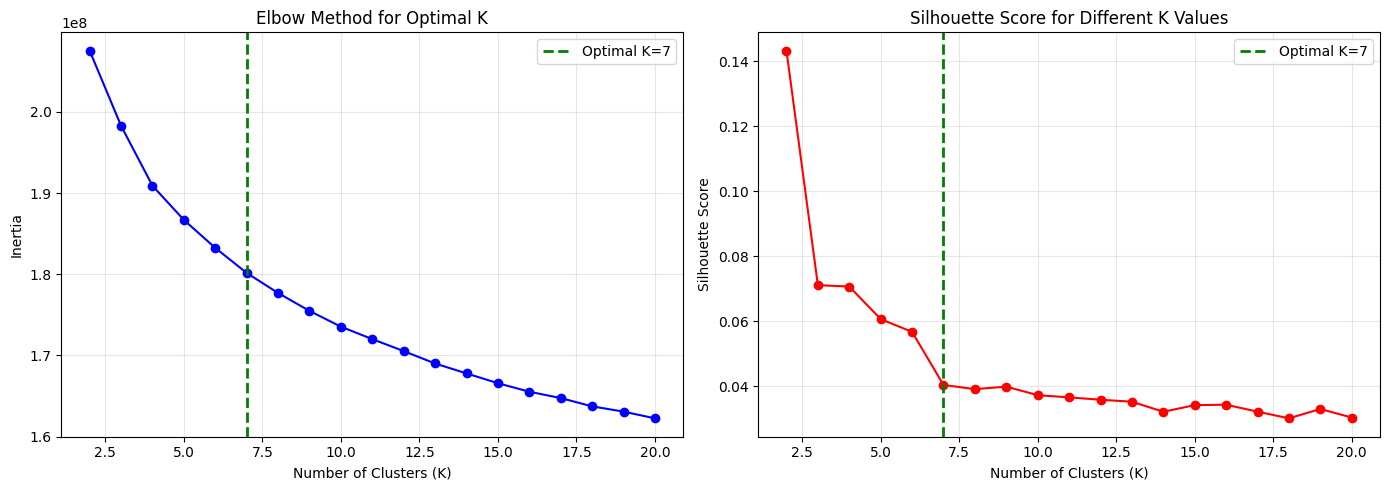

In [40]:
print("Finding optimal K for KMeans...")
inertias = []
silhouette_scores = []
K_range = range(2, 21)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_pca)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans_temp.labels_))

print("Optimal K search complete.")

from kneed import KneeLocator
knee = KneeLocator(list(K_range), inertias, curve='convex', direction='decreasing')
optimal_k = knee.elbow

print(f"Optimal K determined by Elbow Method: {optimal_k}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].axvline(x=optimal_k, color='g', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].axvline(x=optimal_k, color='g', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Different K Values')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### KMeans Clustering

Apply KMeans with the optimal K and evaluate using:
- **Silhouette Score**: Measures cluster separation (-1 to 1, higher is better)
- **Davies-Bouldin Index**: Measures cluster similarity (lower is better)
- **Calinski-Harabasz Score**: Ratio of between/within cluster dispersion (higher is better)

In [41]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)
kmeans_n_clusters = len(np.unique(kmeans_labels))

kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_pca, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_pca, kmeans_labels)

print(f"KMeans - Number of clusters: {kmeans_n_clusters}")
print(f"KMeans - Silhouette Score: {kmeans_silhouette:.4f}")
print(f"KMeans - Davies-Bouldin Index: {kmeans_davies_bouldin:.4f}")
print(f"KMeans - Calinski-Harabasz Score: {kmeans_calinski:.4f}")

KMeans - Number of clusters: 7
KMeans - Silhouette Score: 0.0405
KMeans - Davies-Bouldin Index: 3.3507
KMeans - Calinski-Harabasz Score: 252.1496


### Hierarchical (Agglomerative) Clustering

Apply Ward's hierarchical clustering with the same number of clusters as KMeans for comparison.

In [42]:
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_pca)
hierarchical_n_clusters = len(np.unique(hierarchical_labels))

hierarchical_silhouette = silhouette_score(X_pca, hierarchical_labels)
hierarchical_davies_bouldin = davies_bouldin_score(X_pca, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(X_pca, hierarchical_labels)

print(f"Hierarchical - Number of clusters: {hierarchical_n_clusters}")
print(f"Hierarchical - Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Hierarchical - Davies-Bouldin Index: {hierarchical_davies_bouldin:.4f}")
print(f"Hierarchical - Calinski-Harabasz Score: {hierarchical_calinski:.4f}")

Hierarchical - Number of clusters: 7
Hierarchical - Silhouette Score: 0.0311
Hierarchical - Davies-Bouldin Index: 3.9781
Hierarchical - Calinski-Harabasz Score: 199.7153


### DBSCAN Parameter Selection

Use K-distance graph to select optimal eps parameter for DBSCAN. The "elbow" point in the graph indicates a good eps value.

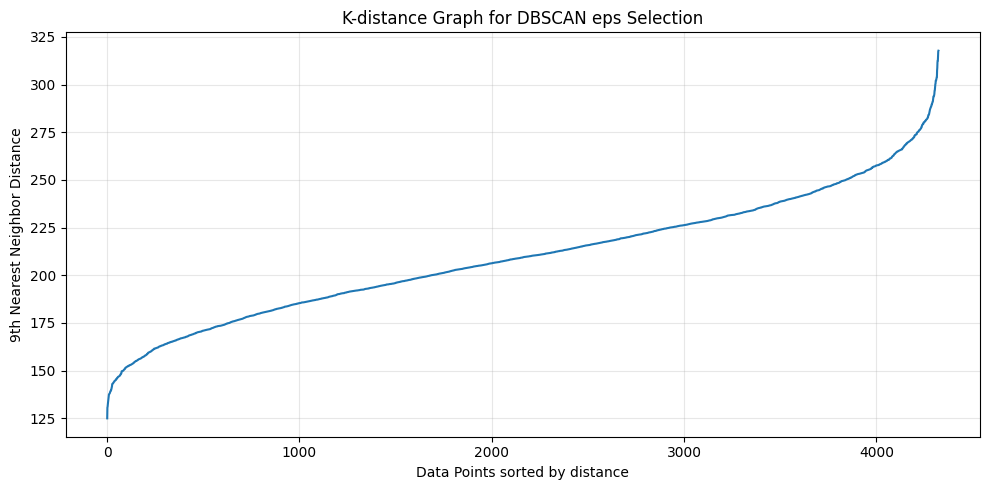

Selected eps: 209.3714


In [43]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=9)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('9th Nearest Neighbor Distance')
plt.title('K-distance Graph for DBSCAN eps Selection')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

eps = np.percentile(distances, 50)
print(f"Selected eps: {eps:.4f}")

### DBSCAN Clustering

Apply DBSCAN density-based clustering with the selected eps parameter. DBSCAN can identify noise points (outliers) that don't belong to any cluster.

In [ ]:
dbscan = DBSCAN(eps=eps, min_samples=3)
dbscan_labels = dbscan.fit_predict(X_pca)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN - Number of clusters: {n_clusters_dbscan}")
print(f"DBSCAN - Number of noise points: {n_noise}")

if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels) - 1:
    dbscan_silhouette = silhouette_score(X_pca, dbscan_labels)
    dbscan_davies_bouldin = davies_bouldin_score(X_pca, dbscan_labels)
    dbscan_calinski = calinski_harabasz_score(X_pca, dbscan_labels)
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"DBSCAN - Davies-Bouldin Index: {dbscan_davies_bouldin:.4f}")
    print(f"DBSCAN - Calinski-Harabasz Score: {dbscan_calinski:.4f}")
else:
    print("DBSCAN - Not enough clusters for valid metrics")
    dbscan_silhouette = dbscan_davies_bouldin = dbscan_calinski = None

DBSCAN - Number of clusters: 4
DBSCAN - Number of noise points: 1145
DBSCAN - Silhouette Score: 0.0244
DBSCAN - Davies-Bouldin Index: 2.9807
DBSCAN - Calinski-Harabasz Score: 46.8455


## 6. Clustering Comparison

Create a comprehensive comparison table of all clustering algorithms with their evaluation metrics.

In [45]:
comparison_data = {
    'Algorithm': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette if dbscan_silhouette else np.nan],
    'Davies-Bouldin Index': [kmeans_davies_bouldin, hierarchical_davies_bouldin, dbscan_davies_bouldin if dbscan_davies_bouldin else np.nan],
    'Calinski-Harabasz Score': [kmeans_calinski, hierarchical_calinski, dbscan_calinski if dbscan_calinski else np.nan],
    'Number of Clusters': [kmeans_n_clusters, hierarchical_n_clusters, n_clusters_dbscan]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*100)
print("CLUSTERING ALGORITHMS COMPARISON")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)

comparison_csv = 'clustering_comparison.csv'
comparison_df.to_csv(comparison_csv, index=False)
print(f"\nComparison saved to '{comparison_csv}'")


CLUSTERING ALGORITHMS COMPARISON
   Algorithm  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Score  Number of Clusters
      KMeans          0.040469              3.350745               252.149639                   7
Hierarchical          0.031134              3.978063               199.715346                   7
      DBSCAN          0.024404              2.980687                46.845547                   4

Comparison saved to 'clustering_comparison.csv'


### Visual Comparison of Clustering Metrics

Create bar charts comparing all clustering algorithms across different evaluation metrics.

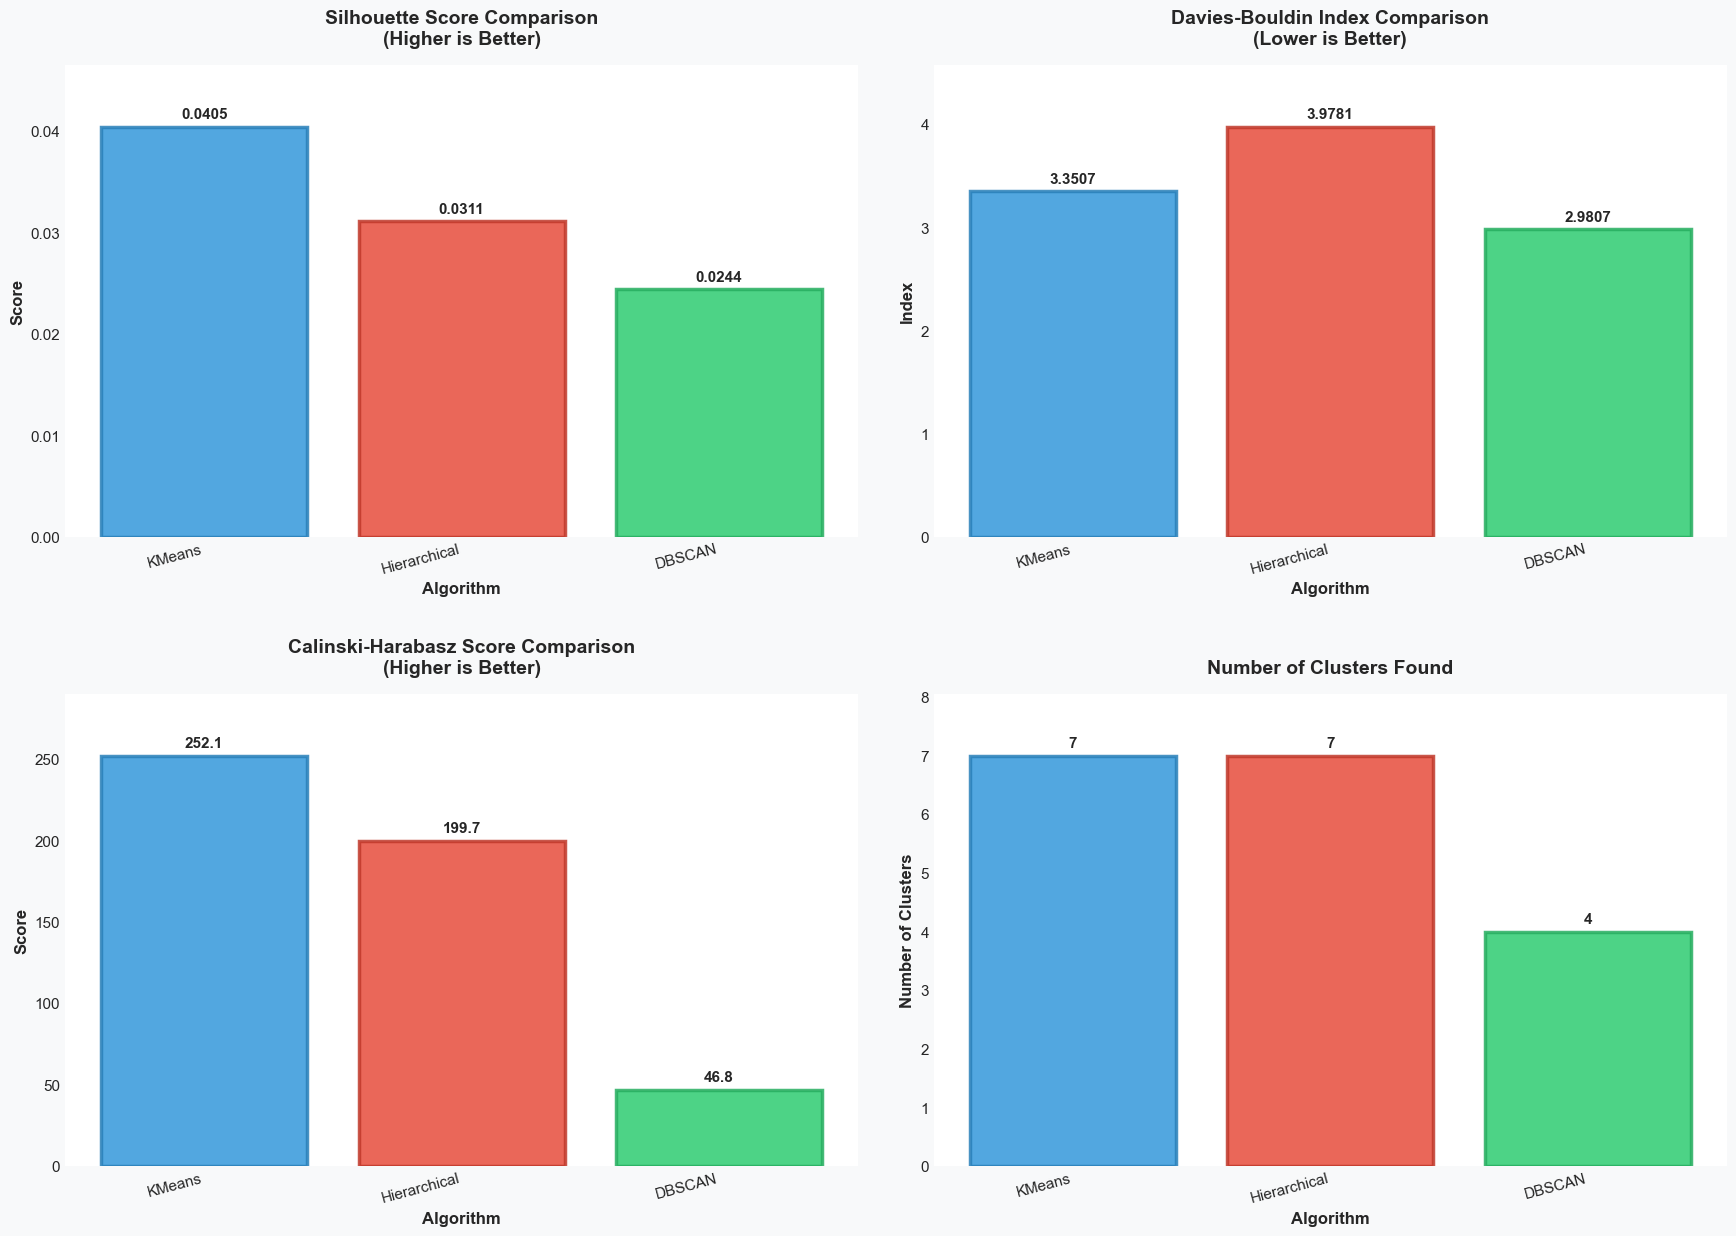

In [46]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(18, 13))
fig.patch.set_facecolor('#f8f9fa')

colors = ['#3498db', '#e74c3c', '#2ecc71']
edge_colors = ['#2980b9', '#c0392b', '#27ae60']

valid_scores = [(comparison_df.loc[i, 'Algorithm'], comparison_df.loc[i, 'Silhouette Score']) 
                for i in range(len(comparison_df)) if not pd.isna(comparison_df.loc[i, 'Silhouette Score'])]
algorithms, scores = zip(*valid_scores)

bars1 = axes[0, 0].bar(algorithms, scores, color=colors, edgecolor=edge_colors, linewidth=2.5, alpha=0.85)
axes[0, 0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Silhouette Score Comparison\n(Higher is Better)', 
                     fontsize=14, fontweight='bold', pad=15)
axes[0, 0].set_ylim([0, max(scores) * 1.15])
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 0].set_facecolor('#ffffff')
for i, (bar, v) in enumerate(zip(bars1, scores)):
    axes[0, 0].text(i, v + max(scores)*0.02, f'{v:.4f}', 
                    ha='center', fontsize=11, fontweight='bold')

valid_db = [(comparison_df.loc[i, 'Algorithm'], comparison_df.loc[i, 'Davies-Bouldin Index']) 
            for i in range(len(comparison_df)) if not pd.isna(comparison_df.loc[i, 'Davies-Bouldin Index'])]
algorithms_db, db_scores = zip(*valid_db)

bars2 = axes[0, 1].bar(algorithms_db, db_scores, color=colors, edgecolor=edge_colors, 
                       linewidth=2.5, alpha=0.85)
axes[0, 1].set_ylabel('Index', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Davies-Bouldin Index Comparison\n(Lower is Better)', 
                     fontsize=14, fontweight='bold', pad=15)
axes[0, 1].set_ylim([0, max(db_scores) * 1.15])
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 1].set_facecolor('#ffffff')
for i, (bar, v) in enumerate(zip(bars2, db_scores)):
    axes[0, 1].text(i, v + max(db_scores)*0.02, f'{v:.4f}', 
                    ha='center', fontsize=11, fontweight='bold')

valid_ch = [(comparison_df.loc[i, 'Algorithm'], comparison_df.loc[i, 'Calinski-Harabasz Score']) 
            for i in range(len(comparison_df)) if not pd.isna(comparison_df.loc[i, 'Calinski-Harabasz Score'])]
algorithms_ch, ch_scores = zip(*valid_ch)

bars3 = axes[1, 0].bar(algorithms_ch, ch_scores, color=colors, edgecolor=edge_colors, linewidth=2.5, alpha=0.85)
axes[1, 0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Calinski-Harabasz Score Comparison\n(Higher is Better)', fontsize=14, fontweight='bold', pad=15)
axes[1, 0].set_ylim([0, max(ch_scores) * 1.15])
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 0].set_facecolor('#ffffff')
for i, (bar, v) in enumerate(zip(bars3, ch_scores)):
    axes[1, 0].text(i, v + max(ch_scores)*0.02, f'{v:.1f}', ha='center', fontsize=11, fontweight='bold')

n_clusters = comparison_df['Number of Clusters'].values
bars4 = axes[1, 1].bar(comparison_df['Algorithm'], n_clusters, color=colors, edgecolor=edge_colors, linewidth=2.5, alpha=0.85)
axes[1, 1].set_ylabel('Number of Clusters', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Number of Clusters Found', fontsize=14, fontweight='bold', pad=15)
axes[1, 1].set_ylim([0, max(n_clusters) * 1.15])
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1, 1].set_facecolor('#ffffff')
for i, (bar, v) in enumerate(zip(bars4, n_clusters)):
    axes[1, 1].text(i, v + max(n_clusters)*0.02, str(v), ha='center', fontsize=11, fontweight='bold')

for ax in axes.flat:
    ax.tick_params(axis='both', labelsize=11)
    ax.set_xlabel('Algorithm', fontsize=12, fontweight='bold')
    for label in ax.get_xticklabels():
        label.set_rotation(15)
        label.set_ha('right')

plt.tight_layout(pad=3.0)
plt.show()

### Cluster Visualization in PCA Space

Visualize the clustering results by projecting onto the first two principal components:
- KMeans with cluster centers marked
- Hierarchical clustering
- DBSCAN with noise points

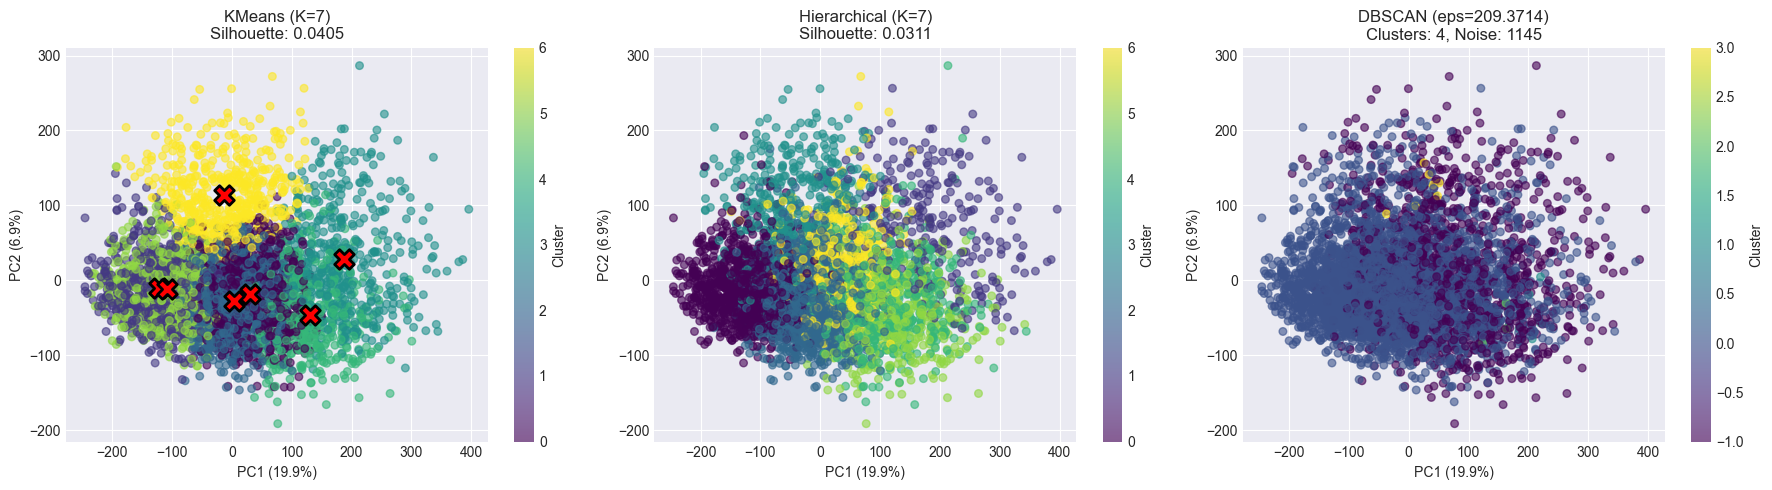

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, s=30)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, edgecolors='black', linewidth=2)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[0].set_title(f'KMeans (K={optimal_k})\nSilhouette: {kmeans_silhouette:.4f}')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.6, s=30)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title(f'Hierarchical (K={optimal_k})\nSilhouette: {hierarchical_silhouette:.4f}')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

colors = ['red' if label == -1 else label for label in dbscan_labels]
scatter3 = axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6, s=30)
axes[2].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[2].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[2].set_title(f'DBSCAN (eps={eps:.4f})\nClusters: {n_clusters_dbscan}, Noise: {n_noise}')
plt.colorbar(scatter3, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.show()

### Save Clustering Results

Export all clustering assignments to a CSV file for further analysis.

In [48]:
clustering_results_df = pca_df.copy()
clustering_results_df['kmeans_cluster'] = kmeans_labels
clustering_results_df['hierarchical_cluster'] = hierarchical_labels
clustering_results_df['dbscan_cluster'] = dbscan_labels

print(f"\nDataset shape: {clustering_results_df.shape}")
print(f"Columns: {list(clustering_results_df.columns[-4:])}")


Dataset shape: (4324, 252)
Columns: ['person_name', 'kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster']


### Cluster Distribution Analysis

Analyze how samples are distributed across clusters for each algorithm.

In [49]:
print("Cluster Distribution Analysis:")
print("\nKMeans clusters:")
print(pd.Series(kmeans_labels).value_counts().sort_index())
print("\nHierarchical clusters:")
print(pd.Series(hierarchical_labels).value_counts().sort_index())

Cluster Distribution Analysis:

KMeans clusters:
0    689
1    694
2    814
3    455
4    450
5    711
6    511
Name: count, dtype: int64

Hierarchical clusters:
0    1061
1     287
2    1251
3     424
4     491
5     424
6     386
Name: count, dtype: int64


### Cluster Composition Analysis

Examine which persons are grouped together in each KMeans cluster to understand clustering behavior.

In [50]:
print("Analyzing face distribution by person_name in each clustering method:\n")

for cluster_id in sorted(set(kmeans_labels)):
    mask = kmeans_labels == cluster_id
    persons = clustering_results_df[mask]['person_name'].value_counts()
    print(f"KMeans Cluster {cluster_id}: {mask.sum()} samples")
    print(f"  Unique persons: {len(persons)}")
    print(f"  Top 10 persons: {dict(persons.head(10))}\n")

Analyzing face distribution by person_name in each clustering method:

KMeans Cluster 0: 689 samples
  Unique persons: 145
  Top 10 persons: {'george w bush': np.int64(83), 'colin powell': np.int64(22), 'ariel sharon': np.int64(22), 'alejandro toledo': np.int64(18), 'donald rumsfeld': np.int64(16), 'gerhard schroeder': np.int64(15), 'luiz inacio lula da silva': np.int64(13), 'mahmoud abbas': np.int64(12), 'hugo chavez': np.int64(11), 'vladimir putin': np.int64(11)}

KMeans Cluster 1: 694 samples
  Unique persons: 144
  Top 10 persons: {'george w bush': np.int64(86), 'colin powell': np.int64(48), 'tony blair': np.int64(21), 'donald rumsfeld': np.int64(21), 'gerhard schroeder': np.int64(18), 'junichiro koizumi': np.int64(13), 'jean chretien': np.int64(13), 'roh moo-hyun': np.int64(12), 'tom ridge': np.int64(12), 'naomi watts': np.int64(10)}

KMeans Cluster 2: 814 samples
  Unique persons: 135
  Top 10 persons: {'george w bush': np.int64(146), 'colin powell': np.int64(49), 'donald rumsfel

## 7. Ground Truth Evaluation

Evaluate clustering quality using person names as ground truth labels:
- **Homogeneity**: Each cluster contains only members of a single class
- **Completeness**: All members of a class are assigned to the same cluster
- **V-Measure**: Harmonic mean of homogeneity and completeness

In [51]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

true_labels = le.fit_transform(clustering_results_df['person_name'])

print("Ground Truth Evaluation (using person_name):")

kmeans_homogeneity = homogeneity_score(true_labels, kmeans_labels)
kmeans_completeness = completeness_score(true_labels, kmeans_labels)
kmeans_v_measure = v_measure_score(true_labels, kmeans_labels)

print(f"\nKMeans (K={7}):")
print(f"  Homogeneity: {kmeans_homogeneity:.4f} (each cluster contains only one person)")
print(f"  Completeness: {kmeans_completeness:.4f} (all samples of person in one cluster)")
print(f"  V-Measure: {kmeans_v_measure:.4f} (harmonic mean of homogeneity and completeness)")

hierarchical_homogeneity = homogeneity_score(true_labels, hierarchical_labels)
hierarchical_completeness = completeness_score(true_labels, hierarchical_labels)
hierarchical_v_measure = v_measure_score(true_labels, hierarchical_labels)

print(f"\nHierarchical (K={7}):")
print(f"  Homogeneity: {hierarchical_homogeneity:.4f}")
print(f"  Completeness: {hierarchical_completeness:.4f}")
print(f"  V-Measure: {hierarchical_v_measure:.4f}")

if n_clusters_dbscan > 1:
    dbscan_homogeneity = homogeneity_score(true_labels, dbscan_labels)
    dbscan_completeness = completeness_score(true_labels, dbscan_labels)
    dbscan_v_measure = v_measure_score(true_labels, dbscan_labels)
    
    print(f"\nDBSCAN:")
    print(f"  Homogeneity: {dbscan_homogeneity:.4f}")
    print(f"  Completeness: {dbscan_completeness:.4f}")
    print(f"  V-Measure: {dbscan_v_measure:.4f}")

Ground Truth Evaluation (using person_name):

KMeans (K=7):
  Homogeneity: 0.0639 (each cluster contains only one person)
  Completeness: 0.1510 (all samples of person in one cluster)
  V-Measure: 0.0898 (harmonic mean of homogeneity and completeness)

Hierarchical (K=7):
  Homogeneity: 0.0627
  Completeness: 0.1581
  V-Measure: 0.0898

DBSCAN:
  Homogeneity: 0.0130
  Completeness: 0.0977
  V-Measure: 0.0229


## 8. Face Similarity Analysis

Compute pairwise cosine distances between all faces to identify the most similar face pairs and analyze same-person vs different-person distance distributions.

In [52]:
from scipy.spatial.distance import euclidean, cosine
from scipy.spatial.distance import pdist, squareform

print("Computing pairwise distances between all faces...")
distances = squareform(pdist(X_pca, metric='cosine'))

print("\nFinding most similar faces (top 5 neighbors for each face):")
similarities_summary = []

for idx in range(len(X_pca)):
    similar_indices = np.argsort(distances[idx])[1:6]
    person_name = clustering_results_df.iloc[idx]['person_name']
    
    for rank, sim_idx in enumerate(similar_indices, 1):
        similar_person = clustering_results_df.iloc[sim_idx]['person_name']
        distance = distances[idx][sim_idx]
        similarities_summary.append({
            'face_idx': idx,
            'person_name': person_name,
            'similar_to_idx': sim_idx,
            'similar_person': similar_person,
            'distance': distance,
            'rank': rank,
            'same_person': person_name == similar_person
        })

similarities_df = pd.DataFrame(similarities_summary)
print(f"\nTotal similarity comparisons: {len(similarities_df)}")
print(f"Rank 1 (nearest neighbor) - Same person match rate: {similarities_df[similarities_df['rank']==1]['same_person'].mean()*100:.1f}%")

Computing pairwise distances between all faces...

Finding most similar faces (top 5 neighbors for each face):

Total similarity comparisons: 21620
Rank 1 (nearest neighbor) - Same person match rate: 18.5%


### Nearest Neighbor Analysis

Visualize:
1. Nearest neighbor accuracy by rank (what % of k-nearest neighbors are the same person)
2. Distance distribution comparison between same-person and different-person pairs

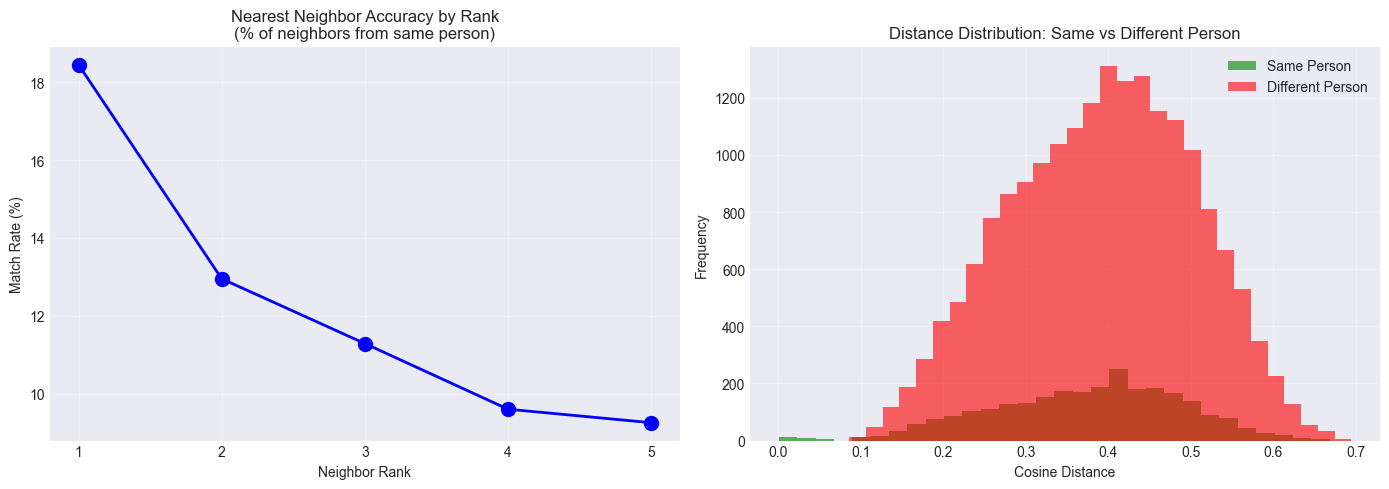


Average distance - Same person: 0.3732
Average distance - Different person: 0.3914


In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

match_by_rank = similarities_df.groupby('rank')['same_person'].mean() * 100
axes[0].plot(match_by_rank.index, match_by_rank.values, 'bo-', linewidth=2, markersize=10)
axes[0].set_xlabel('Neighbor Rank')
axes[0].set_ylabel('Match Rate (%)')
axes[0].set_title('Nearest Neighbor Accuracy by Rank\n(% of neighbors from same person)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 6))

axes[1].hist(similarities_df[similarities_df['same_person']==True]['distance'], bins=30, alpha=0.6, label='Same Person', color='green')
axes[1].hist(similarities_df[similarities_df['same_person']==False]['distance'], bins=30, alpha=0.6, label='Different Person', color='red')
axes[1].set_xlabel('Cosine Distance')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distance Distribution: Same vs Different Person')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAverage distance - Same person: {similarities_df[similarities_df['same_person']==True]['distance'].mean():.4f}")
print(f"Average distance - Different person: {similarities_df[similarities_df['same_person']==False]['distance'].mean():.4f}")

### Similarity-Based Face Grouping

Create face groups based on similarity threshold using hierarchical clustering with cosine distance. This approach groups faces that are more similar together.

In [54]:
similarity_threshold = similarities_df[similarities_df['rank']==1]['distance'].quantile(0.25)
print(f"Similarity threshold (25th percentile of nearest neighbors): {similarity_threshold:.4f}\n")

from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist

print("Creating face groups based on similarity threshold...")
Z = linkage(pdist(X_pca, metric='cosine'), method='ward')
face_groups = fcluster(Z, t=similarity_threshold, criterion='distance')

n_groups = len(set(face_groups))
print(f"Number of face groups created: {n_groups}")
print(f"Distribution of faces per group:")
print(pd.Series(face_groups).value_counts().sort_index().head(20))

face_groups_homogeneity = homogeneity_score(true_labels, face_groups)
face_groups_completeness = completeness_score(true_labels, face_groups)
face_groups_v_measure = v_measure_score(true_labels, face_groups)

print(f"\nFace Groups (threshold={similarity_threshold:.4f}):")
print(f"  Homogeneity: {face_groups_homogeneity:.4f}")
print(f"  Completeness: {face_groups_completeness:.4f}")
print(f"  V-Measure: {face_groups_v_measure:.4f}")

Similarity threshold (25th percentile of nearest neighbors): 0.2671

Creating face groups based on similarity threshold...
Number of face groups created: 3867
Distribution of faces per group:
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    2
17    1
18    1
19    1
20    1
Name: count, dtype: int64

Face Groups (threshold=0.2671):
  Homogeneity: 0.9730
  Completeness: 0.5387
  V-Measure: 0.6935


## 9. Self-Organizing Map (SOM)

Apply Self-Organizing Map (SOM), a neural network-based clustering technique that:
- Preserves topological relationships
- Creates a 2D map of high-dimensional data
- Useful for visualization and clustering simultaneously

In [55]:
from minisom import MiniSom

print("Training Self-Organizing Map (SOM) on PCA features...")

som_x, som_y = 10, 10
som = MiniSom(som_x, som_y, X_pca.shape[1], sigma=3.0, learning_rate=0.5, random_seed=42, neighborhood_function='gaussian')

som.train_batch(X_pca, 1000)
print(f"SOM training complete! Grid: {som_x}x{som_y}")

som_labels = np.array([som.winner(x) for x in X_pca])
som_clusters = som_labels[:, 0] * som_y + som_labels[:, 1]

print(f"Active neurons: {len(set(som_clusters))}")

Training Self-Organizing Map (SOM) on PCA features...
SOM training complete! Grid: 10x10
Active neurons: 100


### SOM Visualization

Display:
1. **Activation Map**: Shows how many samples each neuron represents
2. **PCA Projection**: SOM cluster assignments visualized in PCA space

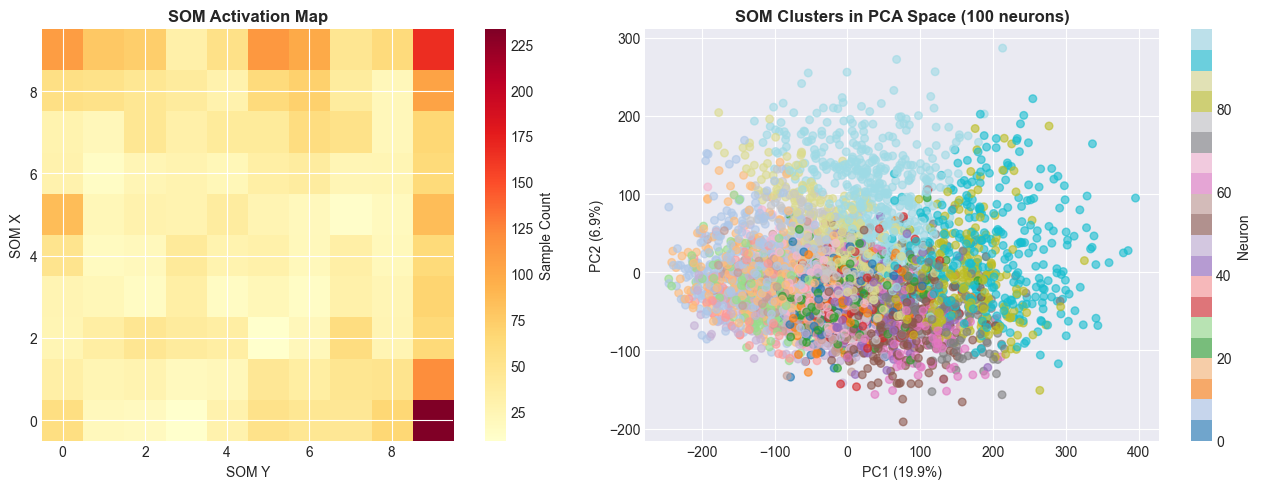

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

activation_map = np.zeros((som_x, som_y))
for c in som_clusters:
    activation_map[c // som_y, c % som_y] += 1

im = axes[0].imshow(activation_map, cmap='YlOrRd', origin='lower')
axes[0].set_title('SOM Activation Map', fontsize=12, fontweight='bold')
axes[0].set_xlabel('SOM Y'); axes[0].set_ylabel('SOM X')
plt.colorbar(im, ax=axes[0], label='Sample Count')

scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=som_clusters, cmap='tab20', alpha=0.6, s=30)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
axes[1].set_title(f'SOM Clusters in PCA Space ({len(set(som_clusters))} neurons)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=axes[1], label='Neuron')

plt.tight_layout()
plt.show()

### SOM Evaluation Metrics

Compute clustering quality metrics and ground truth evaluation for SOM.

In [57]:
som_silhouette = silhouette_score(X_pca, som_clusters)
som_davies_bouldin = davies_bouldin_score(X_pca, som_clusters)
som_calinski = calinski_harabasz_score(X_pca, som_clusters)

som_homogeneity = homogeneity_score(true_labels, som_clusters)
som_completeness = completeness_score(true_labels, som_clusters)
som_v_measure = v_measure_score(true_labels, som_clusters)

print("SOM Clustering Metrics:")
print(f"  Silhouette: {som_silhouette:.4f}")
print(f"  Davies-Bouldin: {som_davies_bouldin:.4f}")
print(f"  Calinski-Harabasz: {som_calinski:.4f}")
print(f"\nGround Truth Evaluation:")
print(f"  Homogeneity: {som_homogeneity:.4f}")
print(f"  Completeness: {som_completeness:.4f}")
print(f"  V-Measure: {som_v_measure:.4f}")

SOM Clustering Metrics:
  Silhouette: -0.0165
  Davies-Bouldin: 4.9665
  Calinski-Harabasz: 24.4492

Ground Truth Evaluation:
  Homogeneity: 0.2776
  Completeness: 0.2872
  V-Measure: 0.2824


## 10. Final Comparison

Create a comprehensive comparison table including all clustering methods (KMeans, Hierarchical, DBSCAN, SOM, and Similarity-based Groups) with both internal and external evaluation metrics.

In [58]:
final_comparison = pd.DataFrame({
    'Method': ['KMeans', 'Hierarchical', 'DBSCAN', 'SOM', 'Similarity Groups'],
    'Clusters': [7, 7, n_clusters_dbscan, len(set(som_clusters)), len(set(face_groups))],
    'Silhouette': [kmeans_silhouette, hierarchical_silhouette, dbscan_silhouette if dbscan_silhouette else np.nan, som_silhouette, np.nan],
    'Homogeneity': [kmeans_homogeneity, hierarchical_homogeneity, dbscan_homogeneity if n_clusters_dbscan > 1 else 0, som_homogeneity, face_groups_homogeneity],
    'Completeness': [kmeans_completeness, hierarchical_completeness, dbscan_completeness if n_clusters_dbscan > 1 else 0, som_completeness, face_groups_completeness],
    'V-Measure': [kmeans_v_measure, hierarchical_v_measure, dbscan_v_measure if n_clusters_dbscan > 1 else 0, som_v_measure, face_groups_v_measure]
})

print("FINAL CLUSTERING COMPARISON (WITH SOM)")
print(final_comparison.to_string(index=False))

final_comparison.to_csv('final_clustering_comparison.csv', index=False)

FINAL CLUSTERING COMPARISON (WITH SOM)
           Method  Clusters  Silhouette  Homogeneity  Completeness  V-Measure
           KMeans         7    0.040469     0.063902      0.151021   0.089804
     Hierarchical         7    0.031134     0.062710      0.158122   0.089804
           DBSCAN         4    0.024404     0.012978      0.097666   0.022911
              SOM       100   -0.016463     0.277640      0.287231   0.282354
Similarity Groups      3867         NaN     0.973030      0.538744   0.693509


### Save Final Results

Export the complete clustering results including SOM assignments and identify the best performing method.

In [59]:
clustering_results_df['som_cluster'] = som_clusters
clustering_results_df['face_group'] = face_groups
clustering_results_df.to_csv('final_clustering.csv', index=False)
print(f"Results saved with SOM clusters!")

Results saved with SOM clusters!


In [60]:
all_labels_df = clustering_results_df[['person_name', 'kmeans_cluster', 'hierarchical_cluster', 'dbscan_cluster', 'som_cluster', 'face_group']]

all_labels_csv = 'all_clustering_labels.csv'
all_labels_df.to_csv(all_labels_csv, index=False)

print(f"All clustering labels saved to '{all_labels_csv}'")

All clustering labels saved to 'all_clustering_labels.csv'


## Conclusion

This notebook demonstrated unsupervised face clustering using multiple algorithms:
- **KMeans** and **Hierarchical** clustering with optimal K selection
- **DBSCAN** for density-based clustering with automatic outlier detection
- **SOM** for neural network-based topological clustering
- **Similarity-based grouping** using distance thresholds

The evaluation metrics help understand each algorithm's strengths in grouping similar faces together.